In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",names=["Frequency","Angle of attack","Chord length","Free-steam velocity","Displacement thickness","sound pressure"])


In [ ]:

data

,Frequency,Angle of attack,Chord length,Free-steam velocity,Displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


Checking For Missing values

In [ ]:

data.isnull().values.any()

False

In [ ]:
data.isnull().sum()

Frequency                 0
Angle of attack           0
Chord length              0
Free-steam velocity       0
Displacement thickness    0
sound pressure            0
dtype: int64

In [ ]:
#airfoil_plot = data.copy()
#sns.pairplot(airfoil_plot)

Normalizing Data to get values between 0 and 1

In [ ]:
data =(data - data.min())/(data.max()-data.min()) 

In [ ]:
x1 = data['Frequency'].values
x2 = data['Displacement thickness'].values
x3 = data['Chord length'].values
x4 = data['Angle of attack'].values
x5 = data['Free-steam velocity'].values
y = data['sound pressure'].values

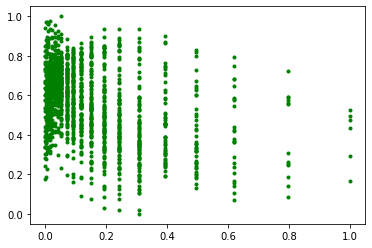

In [ ]:
plt.plot(x1,y,'g.')

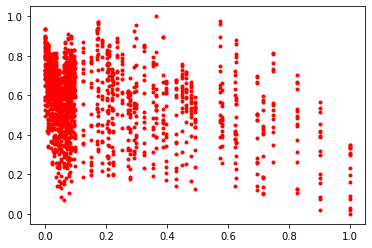

In [ ]:
plt.plot(x2,y,'r.')

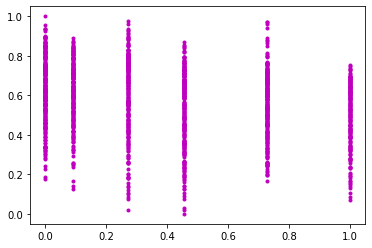

In [ ]:
plt.plot(x3,y,'m.')

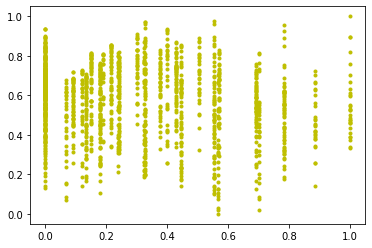

In [ ]:
plt.plot(x4,y,'y.')

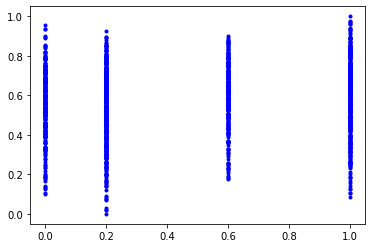

In [ ]:
plt.plot(x5,y,'b.')

Now Let's take a look at ALL the Features

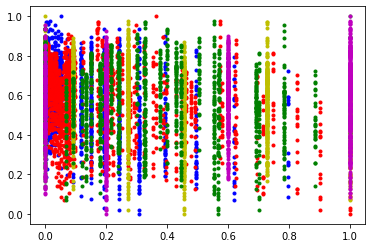

In [ ]:
plt.plot(x1,y,'b.',x2,y,'r.',x3,y,'y.',x4,y,'g.',x5,y,'m.')

Feature Selection

1.Using Pearson Correlation

In [ ]:
data.corr('pearson')['sound pressure']

Frequency                -0.390711
Angle of attack          -0.156108
Chord length             -0.236162
Free-steam velocity       0.125103
Displacement thickness   -0.312670
sound pressure            1.000000
Name: sound pressure, dtype: float64

2.Using Heat Map

Text(0.5, 1.0, 'Correlation Heatmap')

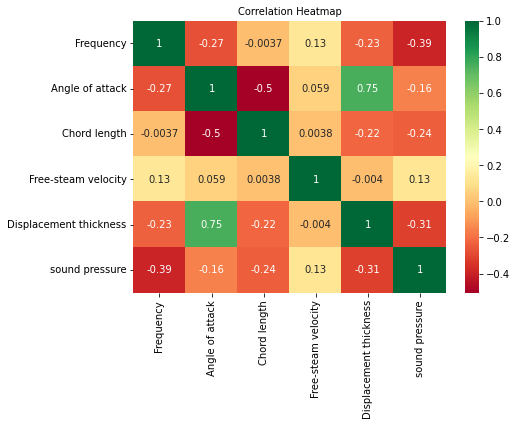

In [ ]:
corr = data.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap', fontsize=10)

3.Using PairPlot to understand Features better

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


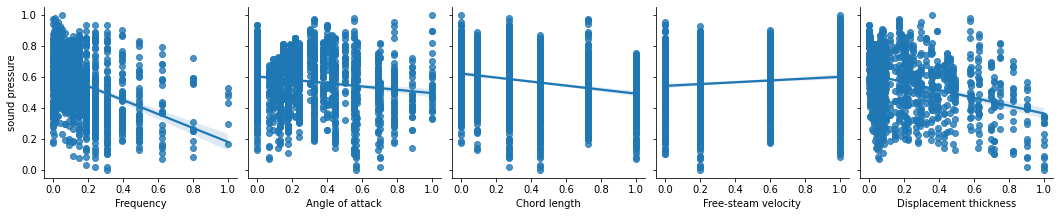

In [ ]:
sns.pairplot(data=data, kind='reg', size = 3,
                  y_vars=['sound pressure'],
                  x_vars=['Frequency', 'Angle of attack', 'Chord length', 'Free-steam velocity', 'Displacement thickness'])

LINEAR REGRESSION

1.Using Univariate
-Selected Feature : Frequency

Splitting Data using TrainTestSplit

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y, test_size=0.2)

In [ ]:
def h(a,x,b):
  return (a*x) + b

In [ ]:
def error(a,x,b,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(h(a,x[i],b)-y[i], 2)
  
  return e/(2*m)

In [ ]:
def step_gradient(a,x,b,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,x[i],b) - y[i]) * x[i]
    grad_b += (1/m) * (h(a,x[i],b) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)

  return a,b

In [ ]:
def descend(init_a,x,init_b,y,learning_rate,iter):
  a = init_a
  b = init_b

  for i in range(iter):
    if i%1000==0:
      print(f"Error: {error(a,x,b,y)} | a: {a} | b: {b}")
    a,b = step_gradient(a,x,b,y,learning_rate)

  return a, b

In [ ]:
a = 0
b = 0 
learning_rate = 0.01

Plotting Before Training

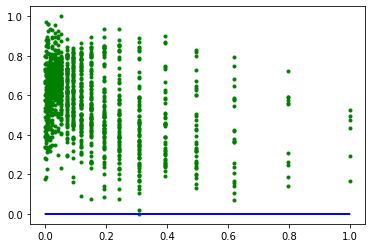

In [ ]:
plt.plot(xtrain, ytrain, 'g.',
         xtrain, h(a, xtrain,b), 'b')

In [ ]:
a, b = descend(a,xtrain,b,ytrain,learning_rate,10000)

Error: 0.182032389042507 | a: 0 | b: 0
Error: 0.015768455493126925 | a: -0.036109108794480774 | b: 0.5794975627528448
Error: 0.014959482461236646 | a: -0.12491216898604286 | b: 0.5920669326734289
Error: 0.014482797207743647 | a: -0.1930817506872031 | b: 0.6017001564801804
Error: 0.014201911590768283 | a: -0.24541039962054298 | b: 0.6090948556448115
Error: 0.014036400429586943 | a: -0.28557915857186866 | b: 0.6147712087384871
Error: 0.013938873383629334 | a: -0.3164136866665071 | b: 0.6191285170923282
Error: 0.013881405810896908 | a: -0.34008302940052537 | b: 0.6224732942365837
Error: 0.013847543184552266 | a: -0.35825219948611625 | b: 0.6250408275016726
Error: 0.013827589714996601 | a: -0.3721993016641871 | b: 0.6270117292338426


Plotting after training

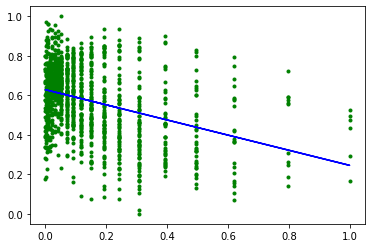

In [ ]:
plt.plot(xtrain, ytrain, 'g.',
         xtrain, h(a, xtrain,b), 'b')

Mean Squared Error

In [ ]:
np.sqrt(error(a, xtrain,b,ytrain))

0.11754076816993744

In [ ]:
np.sqrt(error(a, xtest,b,ytest))

0.1278572193130543

2.Using Multivariate
-Selected Features :

Frequency
Displacement thickness

In [ ]:
x1_train, x1_test ,x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

In [ ]:
def h(a,b,c,x1,x2):
  return (a*x1) + (b*x2) + c

In [ ]:
def error(a,b,c, x1,x2,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(h(a,b,c,x1[i], x2[i])-y[i], 2)
  
  return e/(2*m)

In [ ]:
def step_gradient(a,b,c, x1,x2,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,b,c,x1[i], x2[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (h(a,b,c,x1[i], x2[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (h(a,b,c,x1[i], x2[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)

  return a,b,c

In [ ]:
def descend(init_a,init_b,init_c, x1,x2,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c

  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(error(a,b,c, x1,x2,y),a,b,c))
    a,b,c = step_gradient(a,b,c, x1,x2,y,learning_rate)

  return a,b,c

In [ ]:
a = 0
b = 0 
c = 0
learning_rate = 0.01
iters = 10000

Plotting Before Training

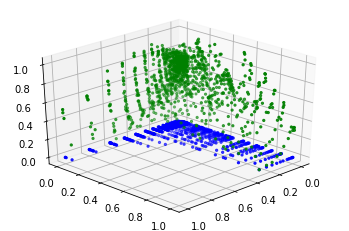

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)

ax.scatter(x1_train, x2_train, y_train, c='g', marker='.')
ax.scatter(x1_train, x2_train, h(a,b,c,x1_train,x2_train), c='b', marker='.')

In [ ]:
a,b,c = descend(a,b,c, x1_train,x2_train,y_train,learning_rate,iters)

Error: 0.18073 | a: 0.00000 | b: 0.00000 | c: 0.00000
Error: 0.01618 | a: -0.03824 | b: -0.03518 | c: 0.58023
Error: 0.01432 | a: -0.13432 | b: -0.12607 | c: 0.61094
Error: 0.01324 | a: -0.21572 | b: -0.18641 | c: 0.63369
Error: 0.01258 | a: -0.28360 | b: -0.22750 | c: 0.65085
Error: 0.01216 | a: -0.33962 | b: -0.25621 | c: 0.66401
Error: 0.01190 | a: -0.38551 | b: -0.27677 | c: 0.67421
Error: 0.01173 | a: -0.42291 | b: -0.29184 | c: 0.68219
Error: 0.01162 | a: -0.45328 | b: -0.30311 | c: 0.68848
Error: 0.01155 | a: -0.47789 | b: -0.31167 | c: 0.69346


Plotting After Training

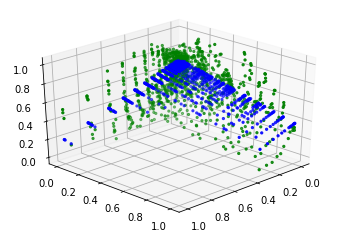

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)

ax.scatter(x1_train, x2_train, y_train, c='g', marker='.')
ax.scatter(x1_train, x2_train, h(a,b,c,x1_train,x2_train), c='b', marker='.')

In [ ]:
np.sqrt(error(a,b,c, x1_train,x2_train,y_train))

0.1072378771361675

In [ ]:
np.sqrt(error(a,b,c, x1_test,x2_test,y_test))

0.10551994002235246

3.Using Polynomial Regression

In [ ]:
x1_train, x1_test ,x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

In [ ]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * np.power(x2, 2) + c

In [ ]:
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i], x2[i]) - y[i]), 2)
    
    return e/(2*m) 

In [ ]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [ ]:
def descend(init_a,init_b,init_c, x1,x2,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c

  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(error(a,b,c, x1,x2,y),a,b,c))
    a,b,c = step_gradient(a,b,c, x1,x2,y,learning_rate)

  return a,b,c

In [ ]:
a = 0
b = 0 
c = 0
learning_rate = 0.01
iters = 10000

In [ ]:
a,b,c = descend(a,b,c, x1_train,x2_train,y_train,learning_rate,iters)

Error: 0.17895 | a: 0.00000 | b: 0.00000 | c: 0.00000
Error: 0.01634 | a: -0.03464 | b: -0.03552 | c: 0.57426
Error: 0.01460 | a: -0.12569 | b: -0.13847 | c: 0.59594
Error: 0.01357 | a: -0.20086 | b: -0.21431 | c: 0.61300
Error: 0.01295 | a: -0.26262 | b: -0.27068 | c: 0.62649
Error: 0.01257 | a: -0.31316 | b: -0.31292 | c: 0.63718
Error: 0.01235 | a: -0.35439 | b: -0.34485 | c: 0.64568
Error: 0.01221 | a: -0.38795 | b: -0.36915 | c: 0.65245
Error: 0.01213 | a: -0.41519 | b: -0.38779 | c: 0.65785
Error: 0.01208 | a: -0.43729 | b: -0.40218 | c: 0.66216


In [ ]:
np.sqrt(error(a,b,c, x1_train,x2_train,y_train))

0.10978865544227777

In [ ]:
np.sqrt(error(a,b,c, x1_test,x2_test,y_test))airfoil_plot = airfoil_dataset.copy()
sns.pairplot(airfoil_plot)

0.10508761278341205

4.Using Multivariate(3 Features)
-Selected Features :

Frequency
Displacement thickness
Chord length

In [ ]:
x1_train, x1_test ,x2_train, x2_test, x3_train, x3_test, y_train, y_test = train_test_split(x1,x2,x3,y,test_size=0.2)

In [ ]:
def h(a,b,c,d,x1,x2,x3):
  return (a*x1) + (b*x2) + (c*x3) + d

In [ ]:
def error(a,b,c,d, x1,x2,x3,y):
  m = len(y)
  e = 0
  for i in range(m):
    e += np.power(h(a,b,c,d,x1[i], x2[i], x3[i])-y[i], 2)
  
  return e/(2*m)

In [ ]:
def step_gradient(a,b,c,d, x1,x2,x3,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  grad_d = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i]) * x3[i]
    grad_d += (1/m) * (h(a,b,c,d,x1[i], x2[i], x3[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
  d = d - (grad_d * learning_rate)

  return a,b,c,dairfoil_plot = airfoil_dataset.copy()
sns.pairplot(airfoil_plot)

In [ ]:
def descend(init_a,init_b,init_c,init_d, x1,x2,x3,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c
  d = init_d


  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f | d: %.5f" %(error(a,b,c,d,x1,x2,x3,y),a,b,c,d))
    a,b,c,d = step_gradient(a,b,c,d, x1,x2,x3,y,learning_rate)

  return a,b,c,d

In [ ]:
a = 0
b = 0 
c = 0
d = 0
learning_rate = 0.01
iters = 10000

In [ ]:

a,b,c,d = descend(a,b,c,d, x1_train,x2_train,x3_train,y_train,learning_rate,iters)

Error: 0.17988 | a: 0.00000 | b: 0.00000 | c: 0.00000 | d: 0.00000
Error: 0.01649 | a: -0.03831 | b: -0.02164 | c: 0.00176 | d: 0.57052
Error: 0.01359 | a: -0.12943 | b: -0.11443 | c: -0.08356 | d: 0.63681
Error: 0.01207 | a: -0.20904 | b: -0.18659 | c: -0.12524 | d: 0.67896
Error: 0.01117 | a: -0.27707 | b: -0.24040 | c: -0.14799 | d: 0.70800
Error: 0.01062 | a: -0.33435 | b: -0.28009 | c: -0.16172 | d: 0.72908
Error: 0.01027 | a: -0.38210 | b: -0.30942 | c: -0.17069 | d: 0.74490
Error: 0.01005 | a: -0.42160 | b: -0.33127 | c: -0.17688 | d: 0.75701
Error: 0.00991 | a: -0.45410 | b: -0.34772 | c: -0.18131 | d: 0.76641
Error: 0.00981 | a: -0.48074 | b: -0.36024 | c: -0.18458 | d: 0.77378


In [ ]:
np.sqrt(error(a,b,c,d,x1_train,x2_train,x3_train,y_train))

0.09874714413473872

In [ ]:
np.sqrt(error(a,b,c,d, x1_test,x2_test,x3_test,y_test))

0.09270944903993779

5.Using Multivariate(All Features)
-Selected Features :

Frequency
Displacement thickness
Chord length
Angle of attack
Free-steam velocity

In [ ]:
x1_train, x1_test ,x2_train, x2_test, x3_train, x3_test, x4_train, x4_test, x5_train, x5_test, y_train, y_test = train_test_split(x1,x2,x3,x4,x5,y,test_size=0.2)


In [ ]:
def h(a,b,c,d,e,f,x1,x2,x3,x4,x5):
  return (a*x1) + (b*x2) + (c*x3) + (d*x4) + (e*x5) + f

In [ ]:
def error(a,b,c,d,e,f, x1,x2,x3,x4,x5,y):
  m = len(y)
  error = 0
  for i in range(m):
    error += np.power((h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i])-y[i]), 2)
  
  return error/(2*m)

In [ ]:
def step_gradient(a,b,c,d,e,f,x1,x2,x3,x4,x5,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  grad_d = 0
  grad_e = 0
  grad_f = 0
  m = len(y)
  for i in range(m):
    grad_a += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x1[i]
    grad_b += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x2[i]
    grad_c += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x3[i]
    grad_d += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x4[i]
    grad_e += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i]) * x5[i]
    grad_f += (1/m) * (h(a,b,c,d,e,f,x1[i], x2[i], x3[i], x4[i], x5[i]) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)
  d = d - (grad_d * learning_rate)
  e = e - (grad_e * learning_rate)
  f = f - (grad_f * learning_rate)

  return a,b,c,d,e,f

In [ ]:
def descend(init_a,init_b,init_c,init_d,init_e,init_f,x1,x2,x3,x4,x5,y,learning_rate,iters):
  a = init_a
  b = init_b
  c = init_c
  d = init_d
  e = init_e
  f = init_f


  for i in range(iters):
    if i%1000==0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f | d: %.5f | e: %.5f | f: %.5f" %(error(a,b,c,d,e,f,x1,x2,x3,x4,x5,y),a,b,c,d,e,f))
    a,b,c,d,e,f  = step_gradient(a,b,c,d,e,f, x1,x2,x3,x4,x5,y,learning_rate)

  return a,b,c,d,e,f

In [ ]:
a = 0
b = 0 
c = 0
d = 0
e = 0
f = 0
learning_rate = 0.01
iters = 10000

In [ ]:
a,b,c,d,e,f = descend(a,b,c,d,e,f,x1_train,x2_train,x3_train,x4_train,x5_train,y_train,learning_rate,iters)

Error: 0.17924 | a: 0.00000 | b: 0.00000 | c: 0.00000 | d: 0.00000 | e: 0.00000 | f: 0.00000
Error: 0.01583 | a: -0.05051 | b: -0.04878 | c: 0.00702 | d: 0.04937 | e: 0.11982 | f: 0.49900
Error: 0.01246 | a: -0.14228 | b: -0.12884 | c: -0.07594 | d: -0.00296 | e: 0.09746 | f: 0.59051
Error: 0.01069 | a: -0.22510 | b: -0.18050 | c: -0.12815 | d: -0.04320 | e: 0.09035 | f: 0.65028
Error: 0.00967 | a: -0.29756 | b: -0.21299 | c: -0.16237 | d: -0.07401 | e: 0.08880 | f: 0.69137
Error: 0.00904 | a: -0.35961 | b: -0.23302 | c: -0.18563 | d: -0.09825 | e: 0.08942 | f: 0.72077
Error: 0.00864 | a: -0.41200 | b: -0.24499 | c: -0.20205 | d: -0.11797 | e: 0.09089 | f: 0.74252
Error: 0.00837 | a: -0.45579 | b: -0.25172 | c: -0.21409 | d: -0.13447 | e: 0.09263 | f: 0.75909
Error: 0.00819 | a: -0.49219 | b: -0.25500 | c: -0.22323 | d: -0.14861 | e: 0.09437 | f: 0.77202
Error: 0.00807 | a: -0.52231 | b: -0.25602 | c: -0.23041 | d: -0.16092 | e: 0.09599 | f: 0.78232


In [ ]:
np.sqrt(error(a,b,c,d,e,f,x1_train,x2_train,x3_train,x4_train,x5_train,y_train))

0.08937480840653521

In [ ]:
np.sqrt(error(a,b,c,d,e,f, x1_test,x2_test,x3_test,x4_test, x5_test,y_test))

0.09899801525720937